# Tactilisation d'une plaque

Le but de ce projet est de tactiliser une plaque rectangulaire de taille a x b ($\approx 10^{-2}$ m).

On importe les librairies utiles et on définit les constantes utilisées plus tard.

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
global a,b,c

a=2e-2 #largeur (x)
b=3e-2 #hauteur (y)
c=1e3
dt=1e-8

tf=1e-4
n=int(tf/dt)

## Méthode des sources secondaires

Pour tenir compte des reflections aux interfaces, on utilisera la méthode des sources secondaires.

In [131]:
def sources_secondaires(x,y,a,b,ordre=5,plot=False):
    
    '''returns a list of secondary sources, given the primary source and the dimensions of the box.
    It can plot them if plot == True'''
    
    if ordre<1:
        raise ValueError('l\'ordre max de reflection considéré doit etre un entier >= 1')
    else:
        pts=[]
        for i in range(ordre):
            pts.append([])
        
        
        for nx in range(-ordre,ordre+1):
            for ny in range(-ordre,ordre+1):
                if abs(nx)+abs(ny)!=0 and abs(nx)+abs(ny)<=ordre:
                    
                    if nx%2==0 and ny%2==0:
                        pts[abs(nx)+abs(ny)-1].append([x+nx*a,y+ny*b])
                    elif nx%2==0 and ny%2!=0:
                        pts[abs(nx)+abs(ny)-1].append([x+nx*a,(ny+1)*b-y])
                    elif nx%2!=0 and ny%2==0:
                        pts[abs(nx)+abs(ny)-1].append([(nx+1)*a-x,y+ny*b])
                    else:
                        pts[abs(nx)+abs(ny)-1].append([(nx+1)*a-x,(ny+1)*b-y])
                     
        if plot:
            fig, ax = plt.subplots(figsize=[5,5])
            
            plt.axis('off')
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            ax.axis('equal')
            fig.tight_layout()
            ax.add_patch(Rectangle([0,0],a,b,ec='k',facecolor='none'))
            
            ax.plot(x,y,'+',label='source')
            for od in range(ordre):
                points=np.array(pts[od])
                ax.plot(points[:,0],points[:,1],'+',label='source image d\'ordre '+str(od+1))   
            ax.legend()
        else:    
            return pts
    

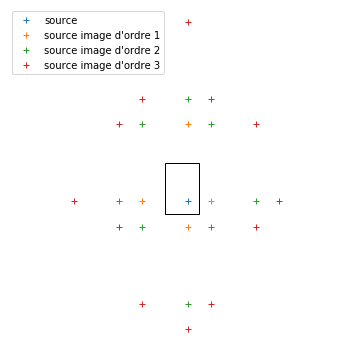

In [132]:
sources_secondaires(a/1.5,b/4,a,b,3,True)

Est ci-après définie la fonction propagation, qui renvoie à partir du signal de départ s, le signal reçu à la reception après propagation selon un chemin unique

In [133]:
def impulse(n,pos=0):
    '''Returns a dirac n-array with the 1 in position pos'''
    if pos > n or n < 0:
        raise ValueError('la position doit être un entier entre 0 et n')
    else:
        res=np.zeros(n)
        res[pos]=1
        return res

def propagation(s,p_source,p_recep,ordre=0):
    '''Modifies the s signal to get what it looks like after propagating along one path'''
    
    
    coeff_r=-.9 # ?
    dist=np.sqrt((p_source[0]-p_recep[0])**2+(p_source[1]-p_recep[1])**2)
    retard=dist/c
    s_retarde=np.concatenate((np.zeros(int(retard/dt)),s),axis=None)
    attenuation=(1+dist)**(-.5)*coeff_r**ordre
    return attenuation*s_retarde  

Text(0, 0.5, 'signal reçu (UA)')

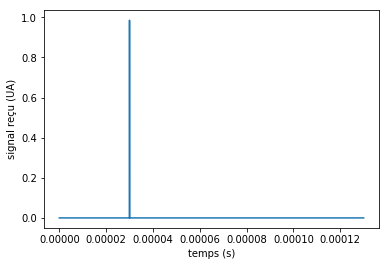

In [134]:
res=propagation(impulse(n),[0.1*a,0],[0.1*a,b])
plt.plot([i*dt for i in range(len(res))],res)
plt.xlabel('temps (s)')
plt.ylabel('signal reçu (UA)')

In [135]:
def add_different_lengths(a,b): # les vecteurs doivent être au format array <!>
    '''Add vectors of different lengths together, stacking them on the left'''
    listes = sorted((a, b), key=len)
    c = listes[1].copy()
    c[:len(listes[0])] += listes[0]
    return c

def reponse(s,p_source,p_recep,ordre_max=30):
    '''somme les réponses de la source principal + sources secondaires jusque ordre_max'''
    signal=propagation(s,p_source,p_recep,0) #ordre 0
    x=p_source[0]
    y=p_source[1]
    liste_sources=sources_secondaires(x,y,a,b,ordre_max)
    for od in range(ordre_max):
        sources=liste_sources[od]
        for point in sources:
            signal=add_different_lengths(signal,propagation(s,point,p_recep,od+1))
    return signal

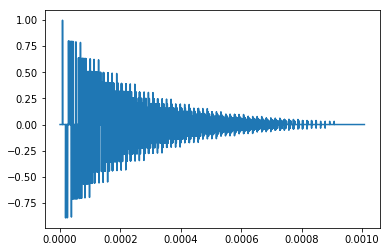

In [136]:
res=reponse(impulse(n),[a/2,b/2],[a/3,b/4],30)
plt.plot([i*dt for i in range(len(res))],res)

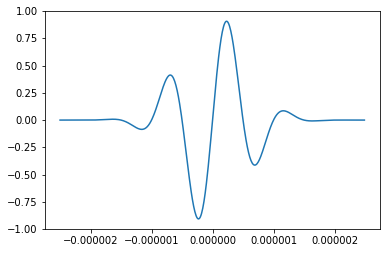

In [137]:
from scipy.signal import gaussian

def signal_large_bande(tspan,fc,bw=1,bwr=-6):
    N=tspan/dt
    vect=[i*dt for i in range(-int(N/2),int(N/2))]
    
    fe=.2*fc
    sin=np.sin([2*np.pi*fc*t for t in vect])
    
    ref=10**(bwr/20)
    a=-(np.pi*fc*bw)**2/4*np.log(ref)
    g=np.array([np.exp(-a*t**2) for t in vect])
    return np.real(sin*g),vect

tspan=5e-6
fc=1e6
bw=1

s=signal_large_bande(tspan,fc,bw)
plt.plot(s[1],s[0])

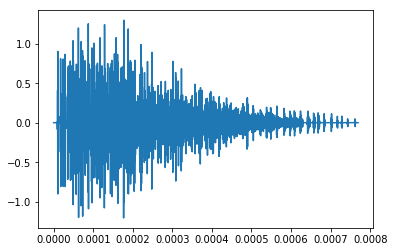

In [138]:
def random_point():
    return [np.random.rand()*a,np.random.rand()*b]


res=reponse(signal_large_bande(tspan,fc),random_point(),random_point(),25)
plt.plot([i*dt for i in range(len(res))],res)

In [139]:
def zone(start=[0,0],dx=a,dy=b,nx=20,ny=30):
    x=ref[0]
    y=ref[1]
    vecx=np.linspace(start[0]+dx/nx,dx*(1+1/nx),nx)
    vecy=np.linspace(start[1]+dy/ny,dy*(1+1/ny),ny)
    points=[]
    for x in vecx:
        for y in vecy:
            points.append([x,y])
    return np.array(points)

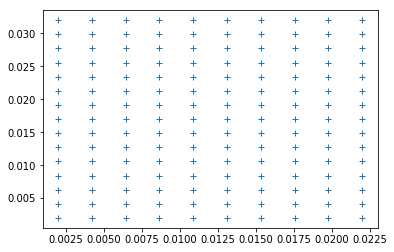

In [140]:
plt.plot(zone()[:,0],zone()[:,1],'+')

In [141]:
correspondance(s,ref,[a/4,b/4],recep1,recep2)

611.2723308559639

In [147]:
np.sum(np.array([1,2,3]))**2

36

In [172]:
def trim(s1,s2):
    L=sorted([s1,s2], key=len)
    L[1]=L[1][:len(L[0])]
    return L[0],L[1]

def correlation(s1,s2):
    itg_cv=np.fft.ifft(np.fft.fft(s1)*np.conj(np.fft.fft(s2)))
    e1=np.sum(s1**2)
    e2=np.sum(s2**2)
    return (e1*e2)**(-.5)*np.max(abs(itg_cv))


def correspondance(s,ref,pt,recep1,recep2,ordre_max=30):
    
    sr1=reponse(s,ref,recep1,ordre_max)
    sr2=reponse(s,ref,recep2,ordre_max)
    s1=reponse(s,pt,recep1,ordre_max)
    s2=reponse(s,pt,recep2,ordre_max)
    
    s1,sr1=trim(sr1,s1)
    C1=correlation(sr1,s1)
    
    s2,sr2=trim(sr2,s2)
    C2=correlation(sr2,s2)
    
    return (C1+C2)/2
    

def zone_correlation(s,ref,recep1,recep2,nx=20,ny=30,plot=False):
    '''Returns either a list with the positions and correlation coeff. or plots it into a matrix'''
    
    res=[]
    zn=zone(nx=nx,ny=ny)
    n=len(zn)
    count=0
    
    for pt in zn:
        C=correspondance(s,ref,pt,recep1,recep2)
        res.append(list(pt)+[C])
        count+=1
        
        if count%(n//10)==0:
            print(str(count)+' points were evaluated in '+str(n)+' total pts')
            
    res=np.array(res)
        
    if plot:
        mat=np.reshape(res[:,2],[ny,nx])
        plt.imshow(abs(mat)/np.max(abs(mat)),extent=[0,20,0,30])
        plt.xlabel('x position (cm)')
        plt.ylabel('y position (cm)')
        plt.title('Correlation(x,y)')
        plt.colorbar()
        
    else:    
        return res

In [162]:
s=np.array(s)
correlation(s,s)

0.999999999978298

In [168]:
correspondance(s,ref,[a/2,b/2],recep1,recep2)

0.685249902099727

In [173]:
s=signal_large_bande(tspan,fc)
ref=[a/3,b/1.5]
recep1=random_point()
recep2=random_point()

## <!> The next cell takes a few minutes to run

60 points were evaluated in 600 total pts
120 points were evaluated in 600 total pts
180 points were evaluated in 600 total pts
240 points were evaluated in 600 total pts
300 points were evaluated in 600 total pts
360 points were evaluated in 600 total pts
420 points were evaluated in 600 total pts
480 points were evaluated in 600 total pts
540 points were evaluated in 600 total pts
600 points were evaluated in 600 total pts


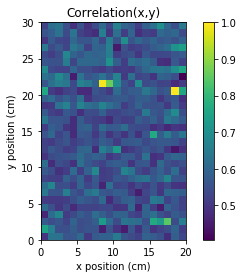

In [174]:
zone_correlation(s,ref,recep1,recep2,plot=True)

In [198]:
def Zoom(s,start,ref,recep1,recep2,nr=20,plot=False):
    '''Does the same as zone_correlation, but zoomed in on start'''
    
    res=[]
    dr=a/10
    center=[start[0]-dr/2,start[1]-dr/2]
    zn=zone(start,dr,dr,nr,nr)
    n=len(zn)
    
    for pt in zn:
        C=correspondance(s,ref,pt,recep1,recep2)
        res.append(list(pt)+[C])
            
    res=np.array(res)
        
    if plot:
        mat=np.reshape(res[:,2],[nr,nr])
        plt.imshow(abs(mat)/np.max(abs(mat)),extent=[start[0]-dr/2,start[0]+dr/2,start[1]-dr/2,start[1]+dr/2])
        plt.xlabel('x position (m)')
        plt.ylabel('y position (m)')
        plt.title('Correlation(x,y)')
        plt.colorbar()
        
    else:    
        return res    

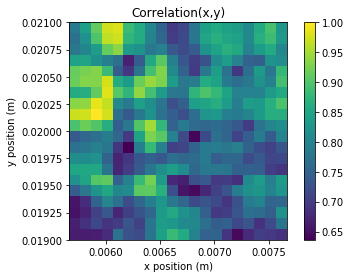

In [199]:
Zoom(s,ref,ref,recep1,recep2,nr=20,plot=True)